## Start of the LNG Project

In [446]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from bs4 import BeautifulSoup as bsoup
import requests
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select
from IPython.display import display, HTML


In [447]:
# # Going to the start of the webpage
# url = "https://www.eia.gov/dnav/ng/ng_move_expc_s1_m.htm"

# # Setting options to not open the browser / make headless
# options = webdriver.ChromeOptions()
# # options.add_argument("headless")

# # Changing the download options
# prefs = {"profile.default_content_settings.popups": 0,
#         "download.default_directory": r"C:\Users\user_dir\Desktop\\", # IMPORTANT - ENDING SLASH V IMPORTANT
#         "directory_upgrade": True}
# options.add_experimental_option('prefs',prefs)


# # Webdriver is in the hw file. But Driver Path is the location in which the chromedriver is located
# DRIVER_PATH = 'chromedriver'
# driver = webdriver.Chrome(executable_path=DRIVER_PATH, options=options)

# # Placing the Website in the webdriver
# driver.get(url)

# # Going through the webpage and finding the new excel file
# file_link = driver.find_element(By.CLASS_NAME, "crumb").send_keys(Keys.ENTER)
# file_link

# # TODO Figure out how to tinker with the importing of the file to get it to save right to the current dirrectory

In [448]:
# Importing the LNG Raw File
xl = pd.ExcelFile('NG_MOVE_EXPC_S1_M.xls')

# Parsing through the excel sheets
xl_sheets = [xl.parse(sheet) for sheet in xl.sheet_names]

# displaying length of the sheet
display(xl.sheet_names)


['Contents', 'Data 1', 'Data 2']

In [449]:
# Displaying the Graph inside sheet 1
Data_Description = xl_sheets[0].iloc[5:7,1:6].rename(columns=xl_sheets[0].iloc[4,1:6])
display(Data_Description)

,Worksheet Name,Description,# Of Series,Frequency,Latest Data for
5,Data 1,Export Volumes,69,Monthly,2/2022
6,Data 2,Export Prices,69,Monthly,2/2022


,Back to Contents,Data 1: Export Volumes,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69
0,Sourcekey,N9130US2,N9132US2,N9132CN2,N9132MX2,N9133US2,NGM_EPG0_EVT_NUS-Z00_MMCF,NGM_EPG0_EVE_NUS-Z00_MMCF,NGM_EPG0_EVE_NUS-NAC_MMCF,NGM_EPG0_EVE_NUS-NAT_MMCF,...,NGM_EPG0_ERE_NUS-NIN_MMCF,NGM_EPG0_ERE_NUS-NJA_MMCF,NGM_EPG0_ERE_NUS-NMX_MMCF,NGM_EPG0_ERE_NUS-NPO_MMCF,NGM_EPG0_ERE_NUS-NKS_MMCF,NGM_EPG0_ERE_NUS-NSP_MMCF,NGM_EPG0_ERE_NUS-NTU_MMCF,NGM_EPG0_ERE_NUS-NUK_MMCF,NGM_EPG0_ENC_NUS-Z00_MMCF,NGM_EPG0_ENC_NUS-NCA_MMCF
1,Date,U.S. Natural Gas Exports (MMcf),U.S. Natural Gas Pipeline Exports (MMcf),U.S. Natural Gas Pipeline Exports to Canada (M...,U.S. Natural Gas Pipeline Exports to Mexico (M...,Liquefied U.S. Natural Gas Exports (MMcf),Liquefied U.S. Natural Gas Exports by Vessel a...,Liquefied U.S. Natural Gas Exports by Vessel (...,U.S. Liquefied Natural Gas Exports by Vessel t...,Liquefied U.S. Natural Gas Exports by Vessel t...,...,Liquefied U.S. Natural Gas Re-Exports to India...,Liquefied U.S. Natural Gas Re-Exports to Japan...,Liquefied U.S. Natural Gas Re-Exports to Mexic...,Liquefied U.S. Natural Gas Re-Exports to Portu...,Liquefied U.S. Natural Gas Re-Exports to South...,U.S. Liquefied Natural Gas Re-Exports to Spai...,Liquefied U.S. Natural Gas Re-Exports to Turke...,Liquefied U.S. Natural Gas Re-Exports to Unite...,Compressed U.S. Natural Gas Exports (Million C...,U.S. Compressed Natural Gas Exports to Canada ...
2,1973-01-15 00:00:00,5808,NaN,60,1373,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1973-02-15 00:00:00,6079,NaN,384,1275,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1973-03-15 00:00:00,4021,NaN,1167,1391,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


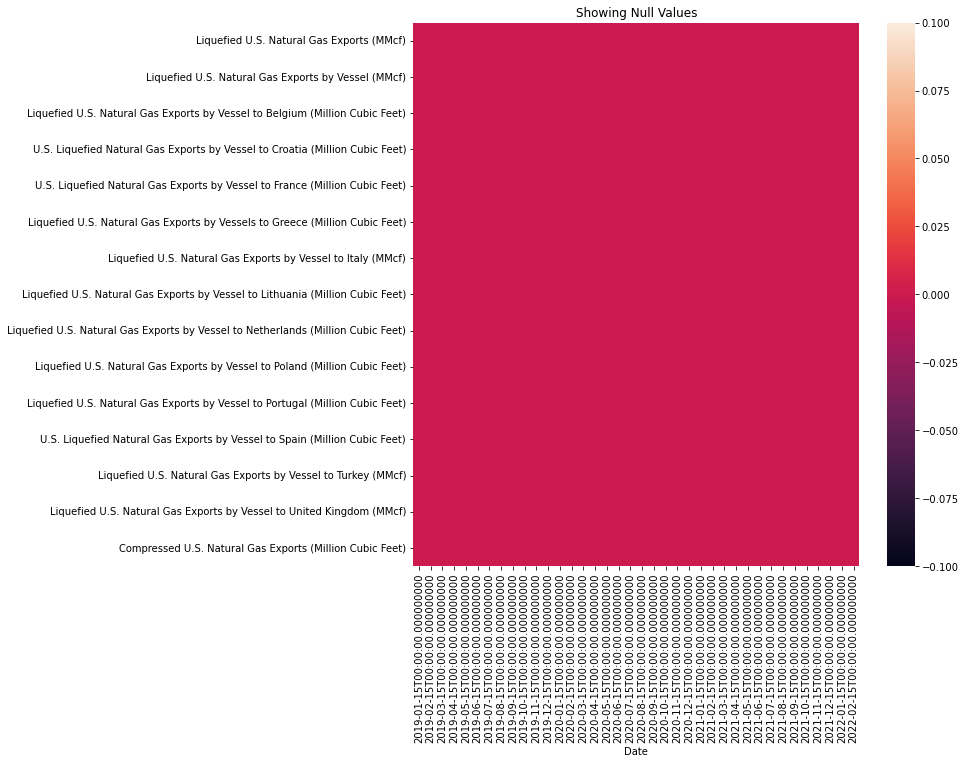

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 38 entries, 2019-01-15 to 2022-02-15
Data columns (total 15 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   Liquefied U.S. Natural Gas Exports (MMcf)                                         38 non-null     float64
 1   Liquefied U.S. Natural Gas Exports by Vessel (MMcf)                               38 non-null     float64
 2   Liquefied U.S. Natural Gas Exports by Vessel to Belgium (Million Cubic Feet)      38 non-null     float64
 3   U.S. Liquefied Natural Gas Exports by Vessel to Croatia (Million Cubic Feet)      38 non-null     float64
 4   U.S. Liquefied Natural Gas Exports by Vessel to France (Million Cubic Feet)       38 non-null     float64
 5   Liquefied U.S. Natural Gas Exports by Vessels to Greece (Million Cubic Feet)      38 non-null  

None

In [450]:
# Now to import the two other sheets
def LNG_Scrubber(df, others):
    """This function takes in the LNG Files and scrubs Them"""
    # Displaying the Raw Data Head
    display(df.head(5))

    # Grabbing the Column Headers and dropping Columns we don't care about. Setting the index to date
    new_cols = df.iloc[1]
    df = df.iloc[2:].copy()
    df.rename(columns=new_cols, inplace=True)
    df['Date'] = pd.to_datetime(df['Date'],  format="%Y%m%d")
    

    # Setting the Index as Date Time
    df.set_index('Date', inplace=True)

    # List of Columns to keep
    col_list = []
    
    # Selecting NATO Countries
    Nato = ['Albania', 'Belgium', 'Bulgaria', 'Canada', 'Croatia', 'Czech Rep', 'Denmark', 'Estonia', 'France', 'Germany', 'Greece', 'Hungary',
        'Iceland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal',
        'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Turkey', 'United Kingdom']

    # Trigger to include other countries of interest
    # TODO Will want to figure out how to append this better. Maybe even add a column for indicating of interest ext
    if others:
        Other_C_of_Interst = ['Japan', 'Israel', 'China', 'India', 'Russia','Taiwan', 'South Korea', ]
        Nato.append(Other_C_of_Interst)

    # Looping through the list an keeping a list of cols that are in Nato
    # Also Scrubbing out other columns that are not needed Re-Exports, Truck... only looking for vessel exports
    for col in enumerate(df.columns[2:]):
        for word in Nato:
            if (col[1].find('to') < 0 and col[1].find('Re-Exports') < 0 and col[1].find('Truck') < 0) \
                 or (col[1].find(word) > 0 and col[1].find('Re-Exports') < 0 and col[1].find('Vessel') > 0):
                df[col[1]] = df[col[1]].astype('float64')
                col_list.append(col[1])

    # Just DF Nato for now
    df = df.loc[:, df.columns.isin(col_list)]
    
    # Grabbing a Certain timeframe
    df = df.loc[df.index >= '2019-01-01']

    # Replacing all the NaN values with 0
    df = df.replace([np.NaN], 0)

    # Displaying a heat map of the head 100
    plt.figure(figsize=(10,10))
    sns.heatmap(df.isna().T)
    plt.title("Showing Null Values")
    plt.show()

    display(df.info())

    return df


# Grabbing the two data sheets
Export_Vol = xl_sheets[1]
Export_Price = xl_sheets[2]

Export_Vol = LNG_Scrubber(Export_Vol, False)


AttributeError: 'Text' object has no property 'rotate'

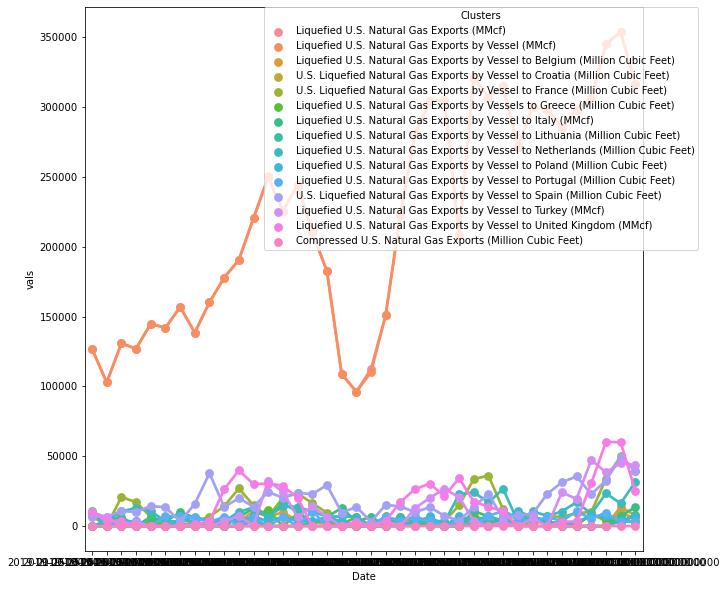

In [451]:
# Showing a plot of the data that we have no recieved
def graphit(df):
    """This Function graphs everything in a lineplot that it is passed"""
    df.reset_index(drop=False, inplace=True)
    dfm =  df.melt(id_vars='Date', var_name='cols', value_name='vals')
    plt.figure(figsize=(10,10))
    sns.pointplot(x="Date", y="vals", hue='cols', data=dfm)
    plt.legend(title="Clusters", bbox_to_anchor=(1.1,1), loc='upper right', borderaxespad=0)
    plt.xticks(rotate=90)
    plt.tight_layout()
    plt.plot()

graphit(Export_Vol)
